In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt

In [20]:
tic = '115177591'

search = lk.search_lightcurve(target=f'TIC {tic}', author='SPOC', exptime=120)
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,115177591,0.0
1,TESS Sector 28,2020,SPOC,120,115177591,0.0
2,TESS Sector 68,2023,SPOC,120,115177591,0.0


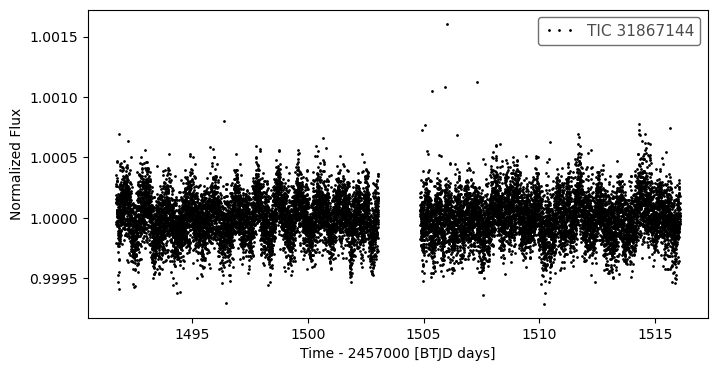

In [24]:
index = 2
lc = search[index].download().normalize()
sector = search.table['mission'][index][12:]

fig, ax = plt.subplots(figsize=(8,4))
lc.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1)
plt.savefig(f'IMG_Outliers_comparing/{tic}_{sector}.jpg')
plt.show();

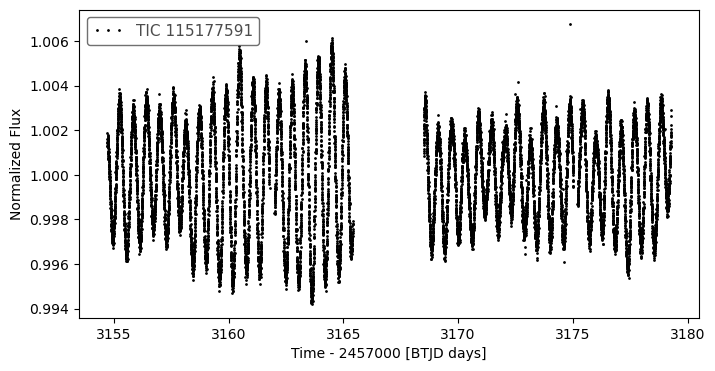

In [21]:
index = -1
lc_clean = search[index].download().normalize().remove_outliers(sigma=3.5)
sector = search.table['mission'][index][12:]

fig, ax = plt.subplots(figsize=(8,4))
lc_clean.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1)
#plt.savefig(f'IMG_Outliers_comparing/{tic}_{sector}_clean.jpg')
#plt.savefig(f'../{tic}_{sector}.jpg')
plt.show();